In [1]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Activities new.csv', sep=';')
df

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,ACTIVITY_DETAIL_EN,_SORTING,USER_NAME,USER_TYPE,CHANGED_TABLE,CHANGED_FIELD,CHANGED_FROM,CHANGED_TO,CHANGE_NUMBER,TRANSACTION_CODE
0,181743,Create Delivery,30.01.2009 10:16,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
1,253499,Create Delivery,27.02.2009 03:33,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
2,628324,Create Delivery,13.07.2009 03:39,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
3,502214,Create Delivery,07.05.2009 03:39,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
4,933370,Create Delivery,29.10.2009 10:18,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483059,921309,Create Delivery,26.10.2009 09:18,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483060,775200,Create Delivery,24.09.2009 08:16,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483061,959593,Create Delivery,23.11.2009 03:33,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
483062,588450,Create Delivery,26.06.2009 14:17,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_node = df.copy()
df_node = df_node[['_CASE_KEY','ACTIVITY_EN','EVENTTIME','USER_TYPE']]
df_node['EVENTTIME'] = pd.to_datetime(df_node['EVENTTIME'])
df_node = df_node.sort_values(by=['_CASE_KEY','EVENTTIME','ACTIVITY_EN'], ascending=True).reset_index(drop=True)
df_node

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE
0,140449,Create Sales Order Item,2009-02-01 03:10:00,B
1,140449,Create Delivery,2009-02-01 03:30:00,B
2,140449,Goods Issue,2009-02-01 04:30:00,B
3,140449,Create Invoice,2009-02-01 11:07:00,B
4,140483,Create Delivery,2009-02-01 07:15:00,B
...,...,...,...,...
483059,1166915,Create Sales Order Item,2010-01-31 16:50:00,A
483060,1166924,Credit Check Release,2010-01-02 09:26:00,A
483061,1166924,Remove Reason for rejection,2010-01-02 09:26:00,A
483062,1166924,Create Sales Order Item,2010-01-31 16:50:00,A


In [4]:
# Generating the trace
variants = df_node.copy()
variants['COUNT'] = variants.groupby('_CASE_KEY').cumcount()+1
variants = variants.pivot(index='_CASE_KEY', columns='COUNT', values='ACTIVITY_EN')
variants_col = variants.columns
variants = variants.fillna('X')
variants = variants.astype('str')
variants['TRACE'] = variants.apply(lambda x: ','.join(x),axis=1)
variants['TRACE'] = variants['TRACE'].apply(lambda x: x.replace(',X',''))
variants

COUNT,1,2,3,4,5,6,7,8,9,10,...,228,229,230,231,232,233,234,235,236,TRACE
_CASE_KEY,,,,,,,,,,,,,,,,,,,,,
140449,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Sales Order Item,Create Delivery,Goods ..."
140483,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Delivery,Create Sales Order Item,Goods ..."
140493,Create Quotation,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Quotation,Create Delivery,Create Sales ..."
140499,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Delivery,Create Sales Order Item,Goods ..."
140502,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Sales Order Item,Create Delivery,Goods ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166902,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Create Sales Order Item,Create Delivery,Goods ..."
1166912,Credit Check Release,Remove Reason for rejection,Create Sales Order Item,Change Net Price,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Credit Check Release,Remove Reason for rejecti..."
1166915,Credit Check Release,Remove Reason for rejection,Create Sales Order Item,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,"Credit Check Release,Remove Reason for rejecti..."


In [5]:
# Getting the number of variants
variants_num = variants[['TRACE',1]].groupby(['TRACE'], as_index=False).count()
variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
del variants_num['index']
variants_num = variants_num.reset_index()
variants_num['index'] = variants_num['index']+1
variants_num = variants_num.rename(columns={'index':'VARIANTS',1:'NO_OF_OCCURANCE'})
variants_num

COUNT,VARIANTS,TRACE,NO_OF_OCCURANCE
0,1,"Create Sales Order Item,Create Delivery,Goods ...",11416
1,2,"Create Delivery,Create Sales Order Item,Goods ...",9306
2,3,"Create Sales Order Item,Create Delivery,Goods ...",5509
3,4,"Create Sales Order Item,Create Delivery,Goods ...",3549
4,5,"Create Sales Order Item,Credit Check Release,R...",3271
...,...,...,...
8928,8929,"Create Delivery,Goods Issue,Pro forma invoice,...",1
8929,8930,"Create Delivery,Goods Issue,Pro forma invoice,...",1
8930,8931,"Create Delivery,Goods Issue,Pro forma invoice,...",1
8931,8932,"Create Delivery,Goods Issue,Pro forma invoice,...",1


In [6]:
# Merging variants with their case key
variant_merge = variants.copy()
variant_merge = variant_merge.reset_index()
variant_merge = variant_merge.merge(variants_num, on='TRACE') #.reset_index()
variant_merge = variant_merge.sort_values(by=('_CASE_KEY')).reset_index(drop=True)
variant_merge = variant_merge.drop(variants_col, axis=1)
variant_merge = variant_merge.drop(['NO_OF_OCCURANCE','TRACE'], axis=1)
variant_merge

COUNT,_CASE_KEY,VARIANTS
0,140449,1
1,140483,2
2,140493,37
3,140499,2
4,140502,1
...,...,...
82901,1166902,1
82902,1166912,2980
82903,1166915,801
82904,1166924,801


In [7]:
# Getting the complete data frame with the variants
df_variants = df_node.copy()
df_variants = df_variants.merge(variant_merge, on='_CASE_KEY')
df_variants

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE,VARIANTS
0,140449,Create Sales Order Item,2009-02-01 03:10:00,B,1
1,140449,Create Delivery,2009-02-01 03:30:00,B,1
2,140449,Goods Issue,2009-02-01 04:30:00,B,1
3,140449,Create Invoice,2009-02-01 11:07:00,B,1
4,140483,Create Delivery,2009-02-01 07:15:00,B,2
...,...,...,...,...,...
483059,1166915,Create Sales Order Item,2010-01-31 16:50:00,A,801
483060,1166924,Credit Check Release,2010-01-02 09:26:00,A,801
483061,1166924,Remove Reason for rejection,2010-01-02 09:26:00,A,801
483062,1166924,Create Sales Order Item,2010-01-31 16:50:00,A,801


In [8]:
variants_final = df_variants.copy()
variants_final = variants_final[variants_final['VARIANTS'] <= 20]
variants_final = variants_final.reset_index(drop=True)
variants_final

,_CASE_KEY,ACTIVITY_EN,EVENTTIME,USER_TYPE,VARIANTS
0,140449,Create Sales Order Item,2009-02-01 03:10:00,B,1
1,140449,Create Delivery,2009-02-01 03:30:00,B,1
2,140449,Goods Issue,2009-02-01 04:30:00,B,1
3,140449,Create Invoice,2009-02-01 11:07:00,B,1
4,140483,Create Delivery,2009-02-01 07:15:00,B,2
...,...,...,...,...,...
228547,1166902,Create Sales Order Item,2010-01-31 16:44:00,A,1
228548,1166902,Create Delivery,2010-04-02 03:37:00,B,1
228549,1166902,Goods Issue,2010-04-02 04:37:00,B,1
228550,1166902,Create Invoice,2010-04-02 08:50:00,B,1


In [9]:
# Deriving the first and last activities of the selected dataframe
activities_list = variants_final.copy()
activities_list = activities_list[['_CASE_KEY','ACTIVITY_EN','EVENTTIME']]
activities_list['COUNT'] = activities_list.groupby('_CASE_KEY').cumcount()+1
activities_list = activities_list.pivot(index='_CASE_KEY', columns='COUNT', values='ACTIVITY_EN')
activities_list

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)
activities_list['First Activity'] = activities_list[1]
activities_list

COUNT,1,2,3,4,5,6,Last Activity,First Activity
_CASE_KEY,,,,,,,,
140449,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,Create Invoice,Create Sales Order Item
140483,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,Create Invoice,Create Delivery
140499,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,Create Invoice,Create Delivery
140502,Create Sales Order Item,Create Delivery,Goods Issue,Create Invoice,NaN,NaN,Create Invoice,Create Sales Order Item
140518,Create Delivery,Create Sales Order Item,Goods Issue,Create Invoice,NaN,NaN,Create Invoice,Create Delivery
...,...,...,...,...,...,...,...,...
1166852,Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Create Invoice,NaN,Create Invoice,Create Sales Order Item
1166853,Create Sales Order Item,Create Delivery,Goods Issue,Pro forma invoice,Create Invoice,NaN,Create Invoice,Create Sales Order Item
1166868,Create Sales Order Item,NaN,NaN,NaN,NaN,NaN,Create Sales Order Item,Create Sales Order Item


In [10]:
variants_final_flow = variants_final.copy()
variants_final_flow_1 = variants_final_flow.iloc[:-1,:]
variants_final_flow_2 = variants_final_flow.iloc[1:,:].reset_index(drop=True)
variants_final_merged = pd.concat([variants_final_flow_1,variants_final_flow_2],axis=1)
variants_final_merged.columns = ['Case_ID','Start Activity','Start Time','Start User','Variant_1','Case_ID2','End Activity','End Time','End User','Variant_2']
variants_final_merged['Comparison'] = variants_final_merged.apply(lambda x: True if x['Case_ID'] == x['Case_ID2'] else False,axis=1)
variants_final_merged = variants_final_merged[variants_final_merged['Comparison'] == True]

variants_final_merged

,Case_ID,Start Activity,Start Time,Start User,Variant_1,Case_ID2,End Activity,End Time,End User,Variant_2,Comparison
0,140449,Create Sales Order Item,2009-02-01 03:10:00,B,1,140449,Create Delivery,2009-02-01 03:30:00,B,1,True
1,140449,Create Delivery,2009-02-01 03:30:00,B,1,140449,Goods Issue,2009-02-01 04:30:00,B,1,True
2,140449,Goods Issue,2009-02-01 04:30:00,B,1,140449,Create Invoice,2009-02-01 11:07:00,B,1,True
4,140483,Create Delivery,2009-02-01 07:15:00,B,2,140483,Create Sales Order Item,2009-02-01 08:10:00,B,2,True
5,140483,Create Sales Order Item,2009-02-01 08:10:00,B,2,140483,Goods Issue,2009-02-01 08:15:00,B,2,True
...,...,...,...,...,...,...,...,...,...,...,...
228543,1166853,Goods Issue,2010-02-02 04:39:00,B,3,1166853,Pro forma invoice,2010-02-02 09:44:00,B,3,True
228544,1166853,Pro forma invoice,2010-02-02 09:44:00,B,3,1166853,Create Invoice,2010-04-02 11:03:00,B,3,True
228547,1166902,Create Sales Order Item,2010-01-31 16:44:00,A,1,1166902,Create Delivery,2010-04-02 03:37:00,B,1,True
228548,1166902,Create Delivery,2010-04-02 03:37:00,B,1,1166902,Goods Issue,2010-04-02 04:37:00,B,1,True


In [11]:
variants_final_graph = variants_final_merged[['Case_ID', 'Start Activity','End Activity']]
variants_final_graph = variants_final_graph.groupby(['Start Activity','End Activity']).size()
variants_final_graph = variants_final_graph.to_frame(name='Weight').reset_index()
variants_final_graph = variants_final_graph.sort_values(by=['Weight'], ascending=False).reset_index(drop=True)
variants_final_graph

,Start Activity,End Activity,Weight
0,Goods Issue,Create Invoice,34523
1,Create Delivery,Goods Issue,32185
2,Create Sales Order Item,Create Delivery,23506
3,Create Delivery,Create Sales Order Item,16049
4,Create Sales Order Item,Goods Issue,16049
5,Goods Issue,Pro forma invoice,13511
6,Pro forma invoice,Create Invoice,11819
7,Create Invoice,Create Sales Order Item,5747
8,Create Invoice,Pro forma invoice,5371
9,Credit Check Release,Remove Reason for rejection,4904


In [12]:
# Start Activities
start_act = activities_list.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act

,Start,First Activity,Weight
0,Start,Create Delivery,20345
1,Start,Create Invoice,2235
2,Start,Create Sales Order Item,27157


In [13]:
# End Activities
end_act = activities_list.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act

,Last Activity,End,Weight
0,Create Invoice,End,36259
1,Create Sales Order Item,End,5366
2,Goods Issue,End,1151
3,Pro forma invoice,End,6279
4,Remove Reason for rejection,End,682


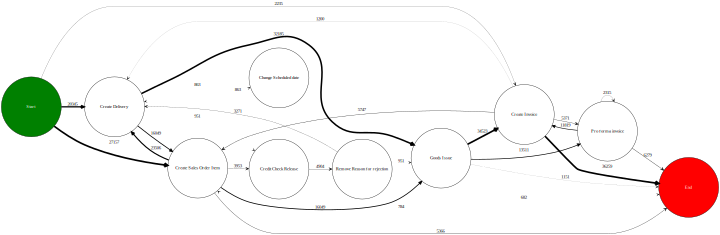

In [14]:
H22 = graphviz.Digraph(format='jpeg')

H22.attr(rankdir='LR', size='10,8')
H22.attr('node', shape='circle', fixedsize='true', height='2.5')
H22.attr('edge', arrowhead='vee', arrowtail='inv')

max_node = 5
max_start_act = start_act['Weight'].max()

nodelist22 = []
for idx, row in start_act.iterrows():
    node112, node222, weight222 = [str(i) for i in row]
    
    if node112 not in nodelist22:
        H22.node(node112, style='filled', fillcolor='green', fontcolor='white')
        nodelist22.append(node222)
    if node222 not in nodelist22:
        H22.node(node222)
        nodelist22.append(node222)
        
    H22.edge(node112, node222, label = weight222, penwidth=str(int(weight222)/max_start_act*max_node))
    
max_case_id = variants_final_graph['Weight'].max()    
nodelist2 = []
for idx, row in variants_final_graph.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H22.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H22.node(node22)
        nodelist2.append(node22)
        
    H22.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))

max_end_act = end_act['Weight'].max()
nodelist33 = []
for idx, row in end_act.iterrows():
    node113, node223, weight333 = [str(i) for i in row]
    
    if node113 not in nodelist33:
        H22.node(node113)
        nodelist33.append(node223)
    if node222 not in nodelist33:
        H22.node(node223, style='filled', fillcolor='red', fontcolor='white')
        nodelist33.append(node223)
        
    H22.edge(node113, node223, label = weight333, penwidth=str(int(weight333)/max_end_act*max_node))
H22
# .render('O2C Test 2nd', view=True)